In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
%cd "/content/gdrive/My Drive/Video Anomaly Detection"

/content/gdrive/My Drive/Video Anomaly Detection


In [3]:
"""
import cv2
import numpy as np 
import glob
import os
import math
import shutil
import stat
def rmtree(top):
    for root, dirs, files in os.walk(top, topdown=False):
        for name in files:
            filename = os.path.join(root, name)
            os.chmod(filename, stat.S_IWUSR)
            os.remove(filename)
        for name in dirs:
            os.rmdir(os.path.join(root, name))
    os.rmdir(top)
videos=glob.glob("*.mp4")
print(videos)
count=5
for i in videos:
    folder="Test\\"+'Test{0:03d}'.format(count)
    # folder="Test"
    if not os.path.exists(folder):
        os.makedirs(folder)
    frame_count=1
    cap=cv2.VideoCapture(i)
    # frame_rate=0.5
    frameRate=5
    while(cap.isOpened()):
        if frame_count==201:
            count+=1
            frame_count=1
            folder="Test\\"+'Test{0:03d}'.format(count)
            # folder="Test"
            if not os.path.exists(folder):
                os.makedirs(folder)
                        
        frameId = cap.get(1)
        ret, frame= cap.read()
        #print(ret)
        if ret==False:
            break
            print("False")
        #if time_elapsed>1./frame_rate:
        if (frameId % math.floor(frameRate) == 0):
            file="/{0:03d}.tif".format(frame_count)
            cv2.imwrite(folder+file,frame)
            frame_count+=1
    
    onlyfiles = next(os.walk(folder))[2] #dir is your directory path as string
    print(len(onlyfiles))
    # if len(onlyfiles)<200:
    #     rmtree(folder)
    #     count-=1 
    cap.release()
    # exit(0)
"""

'\nimport cv2\nimport numpy as np \nimport glob\nimport os\nimport math\nimport shutil\nimport stat\ndef rmtree(top):\n    for root, dirs, files in os.walk(top, topdown=False):\n        for name in files:\n            filename = os.path.join(root, name)\n            os.chmod(filename, stat.S_IWUSR)\n            os.remove(filename)\n        for name in dirs:\n            os.rmdir(os.path.join(root, name))\n    os.rmdir(top)\nvideos=glob.glob("*.mp4")\nprint(videos)\ncount=5\nfor i in videos:\n    folder="Test\\"+\'Test{0:03d}\'.format(count)\n    # folder="Test"\n    if not os.path.exists(folder):\n        os.makedirs(folder)\n    frame_count=1\n    cap=cv2.VideoCapture(i)\n    # frame_rate=0.5\n    frameRate=5\n    while(cap.isOpened()):\n        if frame_count==201:\n            count+=1\n            frame_count=1\n            folder="Test\\"+\'Test{0:03d}\'.format(count)\n            # folder="Test"\n            if not os.path.exists(folder):\n                os.makedirs(folder)\n   

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
from ucsd_dataset import UCSDAnomalyDataset
from video_CAE import VideoAutoencoderLSTM
import torch.backends.cudnn as cudnn
import numpy as np
#matplotlib notebook
import matplotlib.pyplot as plt

In [0]:
model = VideoAutoencoderLSTM()
model.load_state_dict(torch.load('checkpoint.epoch.2.2.pth.tar')['state_dict'])
model.set_cuda()
model=model.eval()

In [0]:
test_ds = UCSDAnomalyDataset('Test')
test_dl = data.DataLoader(test_ds, batch_size=32, shuffle=False)

In [0]:
frames = []
errors = []
for batch_idx, x in enumerate(test_dl):
    # print("hi")
    y = model(x.cuda())
    mse = torch.norm(x.cpu().data.view(x.size(0),-1) - y.cpu().data.view(y.size(0),-1), dim=1)
    errors.append(mse)
errors = torch.cat(errors).numpy()

In [0]:
errors = errors.reshape(-1, 191)
s = np.zeros((2,191))
s[0,:] = 1 - (errors[0,:] - np.min(errors[0,:]))/(np.max(errors[0,:]) - np.min(errors[0,:]))
s[1,:] = 1 - (errors[1,:] - np.min(errors[1,:]))/(np.max(errors[1,:]) - np.min(errors[1,:]))
# s[2,:] = 1 - (errors[2,:] - np.min(errors[2,:]))/(np.max(errors[2,:]) - np.min(errors[2,:]))

Normal Scenario.. 8


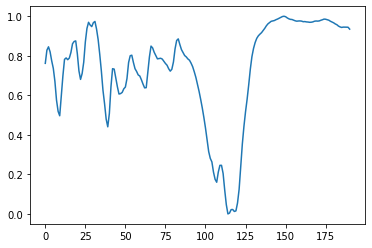

In [9]:
# Test001
if sum(s[0,:]<0.1)>20:
  print("Anomaly..",sum(s[0,:]<0.1))
else:
  print("Normal Scenario..",sum(s[0,:]<0.1))
# s[s[0,:]<0.1]
plt.plot(s[0,:])
plt.show()

Normal Scenario.. 41
41


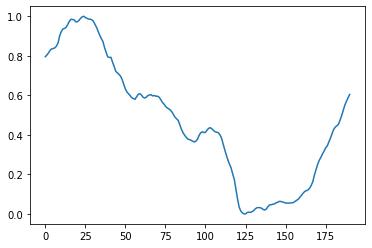

In [10]:
# Test032
if sum(s[0,:]<0.1)>20:
  print("Anomaly..",sum(s[1,:]<0.1))
else:
  print("Normal Scenario..",sum(s[1,:]<0.1))
print(sum(s[1,:]<0.1))
plt.plot(s[1,:])
plt.show()

In [0]:

# import cv2
# import glob
# fol="gdrive/My Drive/Video Anomaly Detection/"
# folder="Test"
# video_name = 'anomaly_video.avi'
# img=cv2.imread("Test/Test001/001.tif")
# print(img.shape)
# width,height,_=img.shape
# # exit(0)
# video = cv2.VideoWriter(video_name, 0, 1, (width, height))
# images=glob.glob('Test/Test001/*.tif')
# print(images)
# for image in images:  
#     video.write(cv2.imread(image))
# cv2.destroyAllWindows()
# video.release()

 
# # print(images)
# # for i in images:

In [0]:
# !ls